#workflow of cnn

- INPUT IMAGE

- CNN LAYER
- AF
- POOLING LAYER
- CON+POOL LAYERS
- FLATTEN
- ANN
-OUTPUT- CLASS/REG

#FILTER/KERNEL -- SMALL MATRIX - EXTRACT FEATURES

- STRIDE - STEP SIZE OF FILTER
- PADDING - extra pixels around the border


#ADV OF CNN

- Automatic feature extraction
- fewer parameters
- high accuracy

#Disadv

- req large amount of training data

- training time is long
- if data is huge it takes a lot amount of time for computation

# CNN uses

- computer vision
 - health care
 - security
 - retail

# 🧪 CNN Hands-On: CIFAR-10 Image Classification

In this exercise, you will work with the **CIFAR-10 dataset**, a popular benchmark dataset used in computer vision.

---

## 📦 About the Dataset

- Contains **60,000 color images**
- Each image size: **32×32 pixels**
- **10 categories**:

`Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck`

- Split into:
  - **50,000 training images**
  - **10,000 testing images**

In [ ]:
#import lib

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
#load the data
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

#50000 - traing data
#32 - height
#32 - width
#3 - RGB

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
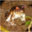

In [ ]:
x_train[0]

In [ ]:
#normaize 0-255 ---->0-1

x_train = x_train/255.0
x_test = x_test/255.0

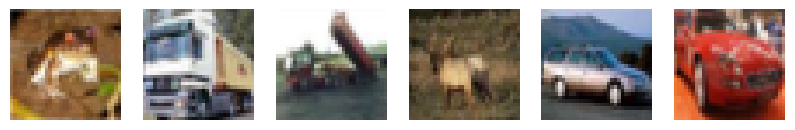

In [ ]:
#images
plt.figure(figsize= (10,4))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

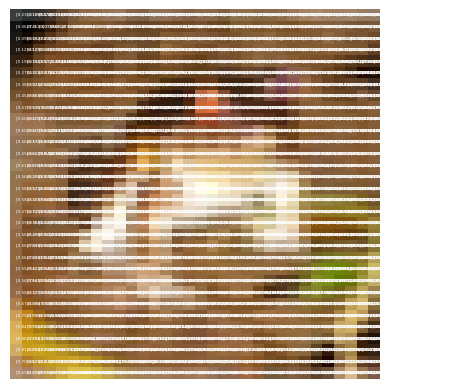

In [ ]:
img = x_train[0]

plt.imshow(img)
plt.axis('off')

for i in range(32):
  for j in range(32):
    plt.text(j,i, f"{img[i,j]}",fontsize = 3,color = 'white')
plt.show()

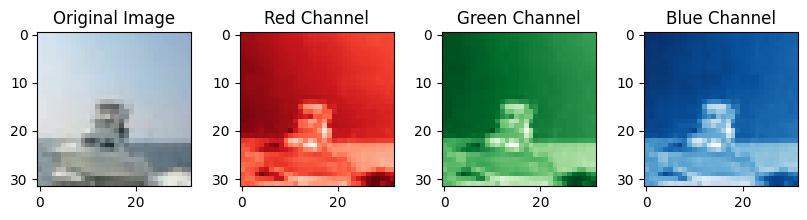

In [ ]:
from functools import cmp_to_key
fig, axs = plt.subplots(nrows=1, ncols= 4, figsize=(10, 2))


axs[0].imshow(x_train[100])
axs[0].set_title('Original Image')


axs[1].imshow(x_train[100][:, :, 0], cmap='Reds')
axs[1].set_title('Red Channel')


axs[2].imshow(x_train[100][:, :, 1], cmap='Greens')
axs[2].set_title('Green Channel')


axs[3].imshow(x_train[100][:, :, 2], cmap='Blues')
axs[3].set_title('Blue Channel')


plt.show()

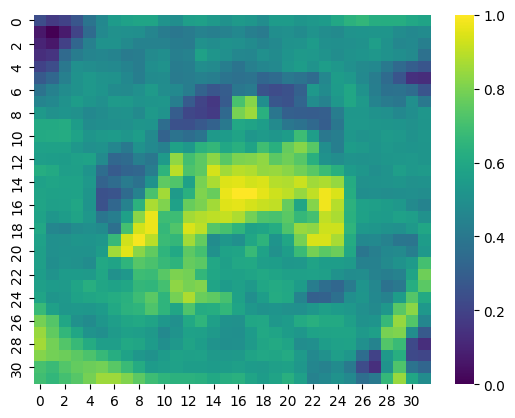

In [ ]:
import seaborn as sns

sns.heatmap(img[:,:,0],cmap = 'viridis')
plt.show()

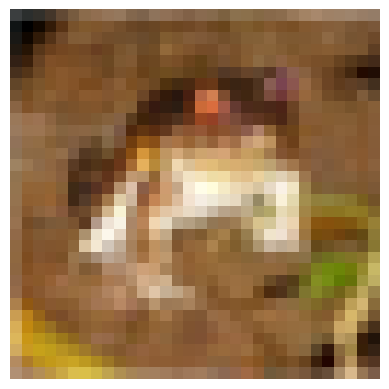

In [ ]:
plt.imshow(img, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [ ]:
#cnn mode

model = models.Sequential([
    #cnn+act+p1
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #p2
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #c3
    layers.Conv2D(64,(3,3),activation = 'relu'),

    #flatten
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#input
- con/poo
-feature
-flatten
-dense

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,validation_data =(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3617 - loss: 1.7428 - val_accuracy: 0.5538 - val_loss: 1.2344
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5770 - loss: 1.1968 - val_accuracy: 0.6157 - val_loss: 1.0992
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6466 - loss: 1.0058 - val_accuracy: 0.6661 - val_loss: 0.9556
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6848 - loss: 0.8989 - val_accuracy: 0.6852 - val_loss: 0.9072
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7107 - loss: 0.8231 - val_accuracy: 0.6930 - val_loss: 0.8964
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7334 - loss: 0.7596 - val_accuracy: 0.6951 - val_loss: 0.8950
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7539 - loss: 0.6995 - val_accuracy: 0.7016 - val_loss: 0.8672
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7720 - loss: 0.659

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7056 - loss: 0.8944


0.7010999917984009

🧠🖼️ Problem Statement: CIFAR-100 Image Classification

The objective of this project is to build a Convolutional Neural Network (CNN) that can classify images into 100 different categories using the CIFAR-100 dataset.

CIFAR-100 is a challenging dataset containing 60,000 color images (32×32 pixels) across 100 fine-grained classes such as apple, dolphin, train, lamp, sunflower, leopard, etc.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 100
